___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [46]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [47]:
import pandas as pd
# ri= pd.read_csv('RI_cleaned.csv').sample(50000, random_state=101)
#ri = pd.read_csv('RI_cleaned.csv', nrows=50000)
ri = pd.read_csv('RI_cleaned.csv')
drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.drop(["stop_date", "stop_time"], axis='columns', inplace=True)
ri["date_time"]=ri.stop_datetime
ri.set_index('stop_datetime', inplace=True)
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,date_time
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [48]:
# Take the mean of the is_arrested column to calculate the overall arrest rate.
ri["is_arrested"].mean()*100

3.454755048024903

In [49]:
# Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.
hourly_arrest_rate=ri.groupby(ri.index.hour).is_arrested.value_counts(normalize=True)*100


In [50]:
hourly_arrest_rate=hourly_arrest_rate.xs(True,level=1)
hourly_arrest_rate

stop_datetime
0     5.215148
1     6.712739
2     6.106715
3     5.261330
4     5.389658
5     3.265666
6     1.294866
7     1.382872
8     1.971737
9     2.469853
10    2.558275
11    2.707782
12    3.136088
13    3.024953
14    3.153077
15    3.212483
16    3.351927
17    3.898863
18    3.990156
19    3.136614
20    3.929206
21    5.995630
22    4.398048
23    4.508698
Name: is_arrested, dtype: float64

In [51]:
# alternative
ri.groupby(ri.date_time.dt.hour).is_arrested.mean()*100

date_time
0     5.215148
1     6.712739
2     6.106715
3     5.261330
4     5.389658
5     3.265666
6     1.294866
7     1.382872
8     1.971737
9     2.469853
10    2.558275
11    2.707782
12    3.136088
13    3.024953
14    3.153077
15    3.212483
16    3.351927
17    3.898863
18    3.990156
19    3.136614
20    3.929206
21    5.995630
22    4.398048
23    4.508698
Name: is_arrested, dtype: float64

In [52]:
# Save the hourly arrest rate Series as a new object, hourly_arrest_rate.
type(hourly_arrest_rate)

pandas.core.series.Series

In [53]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,date_time
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55:00
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30:00
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55:00
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30:00
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,2005-01-12 08:05:00


In [54]:
ri.date_time.head()

stop_datetime
2005-01-02 01:55:00   2005-01-02 01:55:00
2005-01-02 20:30:00   2005-01-02 20:30:00
2005-01-04 12:55:00   2005-01-04 12:55:00
2005-01-06 01:30:00   2005-01-06 01:30:00
2005-01-12 08:05:00   2005-01-12 08:05:00
Name: date_time, dtype: datetime64[ns]

In [55]:
ri.date_time.dt.weekday.unique()

array([6, 1, 3, 2, 0, 4, 5], dtype=int64)

In [56]:

ri.date_time.dt.hour.unique()

array([ 1, 20, 12,  8, 17, 23,  3,  2,  4,  5, 10, 15, 14,  9,  0, 21, 22,
       13, 16, 11,  7, 19, 18,  6], dtype=int64)

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [57]:
# Import matplotlib.pyplot using the alias plt.
import matplotlib.pyplot as plt

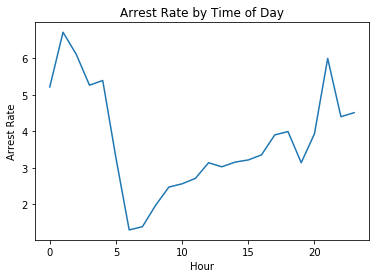

In [58]:
# Create a line plot of hourly_arrest_rate using the .plot() method.
# Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'.
# Display the plot using the .show() function.
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")


plt.plot(hourly_arrest_rate);

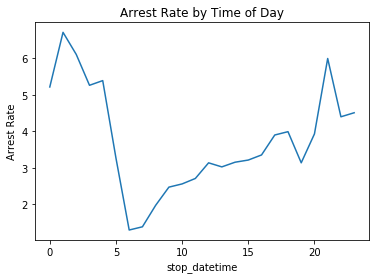

In [59]:
# alternative pandas graph
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")


hourly_arrest_rate.plot();

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [60]:
# Calculate the annual rate of drug-related stops by resampling the drugs_related_stop column 
# (on the 'A' frequency) and taking the mean.
ri.groupby(ri.index.year).drugs_related_stop.mean()*100

stop_datetime
2005    0.803824
2006    0.662442
2007    0.843655
2008    0.754883
2009    1.044701
2010    1.014199
2011    1.140042
2012    1.034273
2013    1.187920
2014    1.317566
2015    1.059758
Name: drugs_related_stop, dtype: float64

In [61]:
# A-Annual, M-monthly, Q-3months
ri.drugs_related_stop.resample("A").mean()*100

stop_datetime
2005-12-31    0.803824
2006-12-31    0.662442
2007-12-31    0.843655
2008-12-31    0.754883
2009-12-31    1.044701
2010-12-31    1.014199
2011-12-31    1.140042
2012-12-31    1.034273
2013-12-31    1.187920
2014-12-31    1.317566
2015-12-31    1.059758
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [62]:
ri.drugs_related_stop.resample("M").mean()*100

stop_datetime
2005-01-31    11.111111
2005-02-28     0.000000
2005-03-31     0.000000
2005-04-30     0.000000
2005-05-31     0.000000
                ...    
2015-08-31     0.938869
2015-09-30     0.817221
2015-10-31     0.642939
2015-11-30     0.736096
2015-12-31     0.884376
Freq: M, Name: drugs_related_stop, Length: 132, dtype: float64

In [63]:
ri.drugs_related_stop.resample("Q").mean()*100

stop_datetime
2005-03-31    3.846154
2005-06-30    0.000000
2005-09-30    0.000000
2005-12-31    0.805389
2006-03-31    0.671798
2006-06-30    0.482744
2006-09-30    0.757799
2006-12-31    0.739613
2007-03-31    0.563340
2007-06-30    0.815868
2007-09-30    1.110264
2007-12-31    0.943057
2008-03-31    0.868922
2008-06-30    0.782796
2008-09-30    0.638817
2008-12-31    0.739092
2009-03-31    0.911985
2009-06-30    1.051163
2009-09-30    0.947763
2009-12-31    1.325690
2010-03-31    1.142156
2010-06-30    0.987176
2010-09-30    1.029412
2010-12-31    0.871922
2011-03-31    1.323546
2011-06-30    1.357597
2011-09-30    0.994983
2011-12-31    0.948321
2012-03-31    1.098901
2012-06-30    1.105256
2012-09-30    0.811535
2012-12-31    1.112724
2013-03-31    1.331019
2013-06-30    1.198402
2013-09-30    1.130812
2013-12-31    1.091528
2014-03-31    1.376829
2014-06-30    1.389209
2014-09-30    1.381859
2014-12-31    1.082964
2015-03-31    1.320132
2015-06-30    1.162791
2015-09-30    1.0497

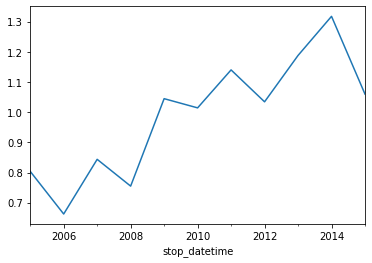

In [64]:
# Save the annual drug rate Series as a new object, annual_drug_rate.
annual_drug_rate=ri.drugs_related_stop.resample("A").mean()*100
annual_drug_rate.plot();

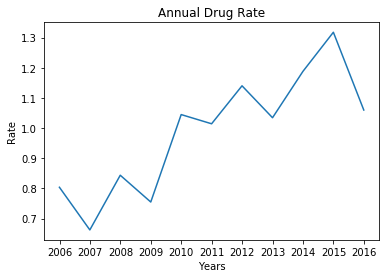

In [65]:
# Create a line plot of annual_drug_rate using the .plot() method.
# Display the plot using the .show() function.
plt.plot(annual_drug_rate)
plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Annual Drug Rate")
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [66]:
ri.columns

Index(['id', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district',
       'date_time'],
      dtype='object')

In [69]:
# Calculate the annual search rate by resampling the search_conducted column, and save the result as annual_search_rate
# annual_search_rate=ri.groupby("year").search_conducted.value_counts(normalize=True).xs(True,level=1)*100

ri.search_conducted.value_counts()

False    462822
True      17762
Name: search_conducted, dtype: int64

In [71]:
ri.search_conducted.dtypes

dtype('O')

In [73]:
ri["search_conducted"]=ri.search_conducted.astype("bool")
ri.search_conducted.dtypes

dtype('bool')

In [76]:
ri.groupby(ri.date_time.dt.year).search_conducted.mean()*100

date_time
2005    5.069158
2006    3.774842
2007    4.184367
2008    3.954356
2009    4.984932
2010    4.208925
2011    3.776683
2012    3.227766
2013    2.905396
2014    3.015672
2015    2.783247
Name: search_conducted, dtype: float64

In [80]:
# Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
annual_search_rate=ri.search_conducted.resample("A").mean()*100

In [81]:
annual=pd.concat([annual_search_rate, annual_drug_rate], axis = 1)
annual

,search_conducted,drugs_related_stop
stop_datetime,,
2005-12-31,5.069158,0.803824
2006-12-31,3.774842,0.662442
2007-12-31,4.184367,0.843655
2008-12-31,3.954356,0.754883
2009-12-31,4.984932,1.044701
2010-12-31,4.208925,1.014199
2011-12-31,3.776683,1.140042
2012-12-31,3.227766,1.034273
2013-12-31,2.905396,1.187920


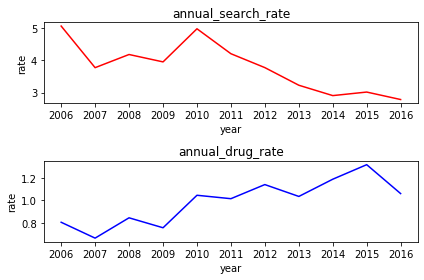

In [82]:
# Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
# Display the subplots.
plt.subplot(2,1,1)
plt.xlabel("year")
plt.ylabel("rate")
plt.title("annual_search_rate");
plt.plot(annual.index, annual.search_conducted, "r")
plt.subplot(2,1,2)
plt.xlabel("year")
plt.ylabel("rate")
plt.title("annual_drug_rate");
plt.plot(annual.index, annual.drugs_related_stop, "b")
plt.tight_layout()
plt.show()

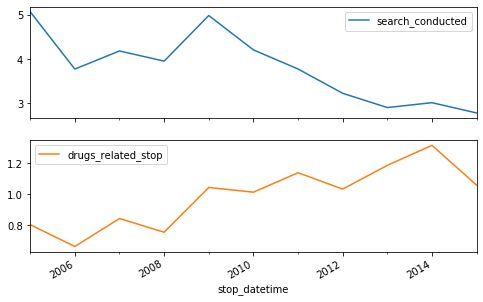

In [92]:
# alternate
annual.plot(subplots=True,figsize=(8,5));

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [93]:
ri.district.value_counts()

Zone X4    125670
Zone K3    108868
Zone K2     97281
Zone X3     89431
Zone K1     46110
Zone X1     13224
Name: district, dtype: int64

In [94]:
ri.violation.value_counts()

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [95]:
# Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
# Save the ``frequency table`` as a new object, ``all_zones``.
all_zones=pd.crosstab(ri.district,ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [96]:
# Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
all_zones.loc["Zone K1":"Zone K3"]

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [99]:
# Save the smaller table as a new object, ``k_zones``.
k_zones=all_zones[all_zones.index.str.startswith("Zone K")]
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [102]:
# alternate
k_zones = all_zones.loc["Zone K1" : "Zone K3"]
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

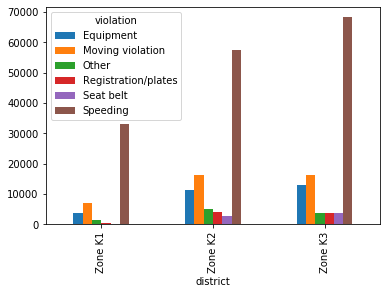

In [103]:
k_zones.plot.bar();
# k_zones.plot(kind = "bar")

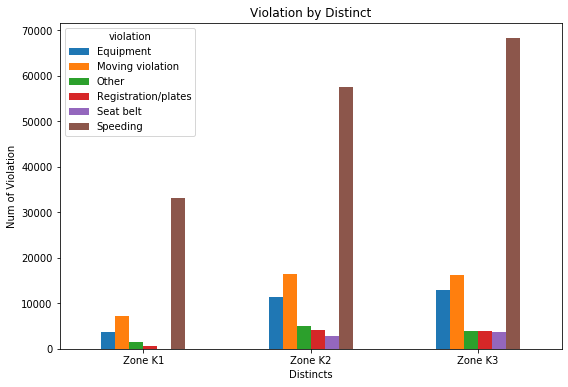

In [105]:
# alternative bar plot with oop
ax=k_zones.plot.bar(rot=0, figsize=(9,6))
ax.set_xlabel('Distincts')
ax.set_ylabel('Num of Violation')
ax.set_title('Violation by Distinct');

In [ ]:
# Display the plot and examine it. What do you notice about each of the zones?

????????????????????

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

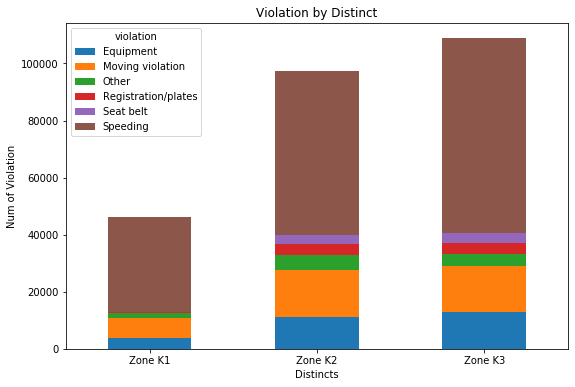

In [106]:
# stack bar plot with oop
ax=k_zones.plot.bar(rot=0, stacked="True",figsize=(9,6))
ax.set_xlabel('Distincts')
ax.set_ylabel('Num of Violation')
ax.set_title('Violation by Distinct');

In [ ]:
# Display the plot and examine it. Do you notice anything different about the data than you did previously?

?????????????????????

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

In [107]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [108]:
# alternative
# ri.stop_duration.replace(to_replace={"0-15 Min":8, "16-30 Min":23, "30+ Min":45, "1":1, "2":2}, inplace=True)
int_values=ri.stop_duration.replace(["0-15 Min","16-30 Min","30+ Min","1","2"], [8, 23,45,1,2])
int_values.value_counts().index

Int64Index([8, 23, 45, 1, 2], dtype='int64')

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [109]:
# Print the unique values in the stop_duration column. (This has been done for you.)
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min' '2' '1']


In [110]:
# Create a dictionary called mapping that maps the stop_duration strings to the integers specified above.
keys=list(ri.stop_duration.unique())
values=list(int_values.value_counts().index)
mapping=dict(zip(keys,values))
mapping

{'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45, '2': 1, '1': 2}

In [111]:
# Convert the stop_duration strings to integers using the mapping, and store the results in a new column called stop_minutes.
# stop_minutes
ri["stop_minutes"]=ri.stop_duration.replace(to_replace=mapping)


In [112]:
# Print the unique values in the stop_minutes column, to verify that the durations were properly converted to integers.
print(ri.stop_minutes.unique())

[ 8 23 45  1  2]


***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [113]:
# For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
ri.groupby("violation_raw").stop_minutes.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454171
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.833954
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589151
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [115]:
# Save the resulting ``Series`` as a new object, ``stop_length``.

stop_length=ri.groupby("violation_raw").stop_minutes.mean()
type(stop_length)

pandas.core.series.Series

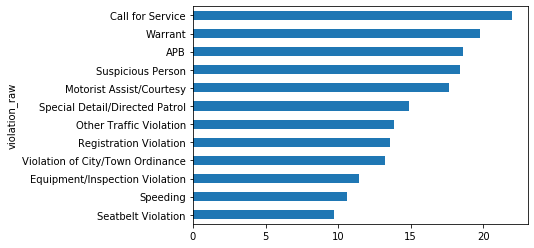

In [116]:
# Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.

stop_length.sort_values(inplace=True)
stop_length.plot.barh();

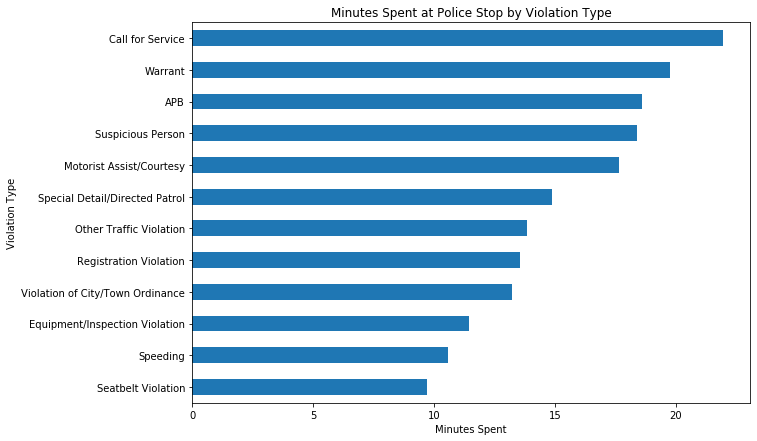

In [117]:
# Alternate
# Creating bar plot of stop_length DataFrame
ax = stop_length.plot.barh(rot=0, figsize=(10,7))
plt.title('Minutes Spent at Police Stop by Violation Type')
plt.xlabel('Minutes Spent')
plt.ylabel('Violation Type')
plt.show()

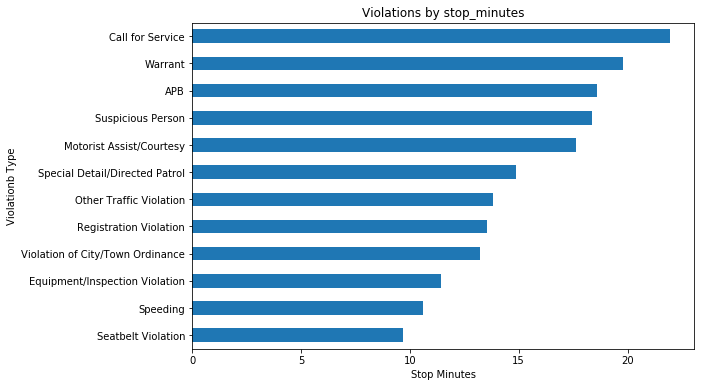

In [118]:
# barh plot with oop
ax=stop_length.plot.barh(rot=0, figsize=(9,6))
ax.set_xlabel('Stop Minutes')
ax.set_ylabel('Violationb Type')
ax.set_title('Violations by stop_minutes');